In [16]:
import matplotlib.pyplot as plt
from time import time
from random import randint
import math

def run_and_plot(functions, names, generate_instance, start, end, step):
    for f in functions:
        timings = []
        for i in range(start, end, step):
            args = generate_instance(i)
            startt = time()
            f(*args)
            endt = time()
            timings.append(endt - startt)
        plt.plot(timings)
    plt.legend([n for n in names])

## Text justification: DP

In [17]:
W_example = ["jars", "jaws", "joke", "jury", "juxtaposition"]
L_example = 15

In [18]:
def tj_recursive(L, W):
    def P(i, j): # penalty
        length = sum([len(W[k]) for k in range(i, j)])
        length += j - i - 1 # adding spaces
        if length > L:
            return math.inf
        return (L - length)**3
    
    def TJP(i):
        if i == 0: 
            return 0
        return min([TJP(j) + P(j, i) for j in range(i)])
    
    return TJP(len(W))

In [19]:
def tj_dynamic_obf(L, W):
    # the same P as in recursive solution
    def P(i, j):
        length = sum([len(W[k]) for k in range(i, j)])
        length += j - i - 1
        if length > L:
            return math.inf
        return (L - length)**3
    
    def TJP(n):
        tbl = [ math.inf ] * (n + 1)
        tbl[0] = 0
        for i in range(1, n + 1):
            tbl[i] = min([tbl[j] + P(j, i) for j in range(i)])
        return tbl[n]

    return TJP(len(W))

In [20]:
tj_dynamic_obf(L_example, W_example)

440

In [21]:
def tj_dynamic(L, W):
    n = len(W)
    tbl = [ math.inf ] * (n + 1)
    tbl[0] = 0
    for i in range(1, n + 1):
        for j in range(i):
            length = i - j - 1
            for k in range(j, i):
                length += len(W[k])
            if length > L:
                P = math.inf
            else:
                P = (L - length)**3
            tbl[i] = min(tbl[i], tbl[j] + P)
    return tbl[n]

In [22]:
tj_dynamic(L_example, W_example)

440

In [23]:
def gen_text(len_text, len_word):
    return ["A" * randint(1, len_word) for _ in range(len_text)]

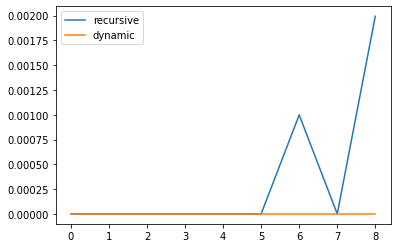

In [24]:
L = 50
run_and_plot(
    [tj_recursive, tj_dynamic],
    ["recursive", "dynamic"],
    lambda n: (L, gen_text(n, L // 5)), 
    1, 10, 1
)

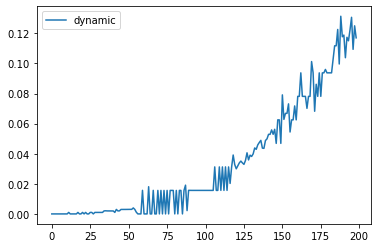

In [25]:
L = 50
run_and_plot(
    [tj_dynamic],
    ["dynamic"],
    lambda n: (L, gen_text(n, L // 5)), 
    1, 200, 1
)